# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 3</span>

### Exercise 03.1 <span style="color:red"> Plain vanilla option pricing </span>

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes <span style="color:blue"> analytic solution </span> for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1. <span style="color:red"> By sampling **directly** the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$
2. <span style="color:red"> By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Remember that given an asset price $S\sim GBM(\mu,\sigma^2)$, with initial value $S(0)$, then
    $$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
    where $W(t)\sim\mathcal{N}(0,t)$.
    Moreover, since the increments of $W$ are independent and normally distributed, the simple recursive procedure for sampling discretized values of $S\sim GBM(\mu,\sigma^2)$ at $t_1 < t_2 < … < t_n$ is:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    with $Z_i \sim \mathcal{N}(0,1)$
</p>

<span style="color:red">Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties </span> with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$</font>. <span style="color:blue"> As usual, in computing statistical uncertainties, use data blocking.</span>

### For comparison, Black-Scholes analytic solution:

In [1]:
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


## Exercise 03.01 Soluzione - Proposta

### European Options:

Le options, in italino obbligazioni, sono dei contratti tra due parti: un writer, il quale vende a un compratore, l'holder, un diritto.

Esistono due tipi di options:

  1. Call-options: l'holder compra oggi al tempo t ad un prezzo $C(t)$ il diritto di comprare in futuro un bene ad un prezzo concordato $K$.
      In questo caso l'holder, quando decidera' di esercitare il proprio diritto ad un tempo $T$, avra' un profitto pari a $S(T)-K$ se $K<S(T)$.
      
  2. Pull-options: in questo caso l'holder compra ad un prezzo $P(t)$ il diritto di rivendere ad un prezzo K, in questo caso il profitto sara' $K-S(T)$ se $K>S(T)$.
  
  
In entrambi i casi per calcolare l'effettivo quando guadagno al tempo $T$, che corrispondera' al prezzo a cui si vuole comprare oggi l'obbligazione per non risentire delle fluttuazioni del mercato; bisognera' scontare il profitto di un fattore $\exp(-rT)$, corrispondente al termine di interesse applicato dalla banca.

Risulta necessario un metodo per la stima del valore economico del bene $S(t)$.

### Moto Browniano Geometrico

L'andamento di S(t) e' descritto da un moto stocastico, in particolare da un moto browniano geometrico, per cui risulta essere: 

 $$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
  
  
  Dove $(\mu-\frac{1}{2}\sigma^2)t$
rappresenta il contributo deterministico dell'evoluzione temporale, dipendente dal parametro $\mu$ che esprime la crescita media del prezzo dell'asset. Invece $\sigma W(t)$ rappresenta il contributo stocastico , il parametro $\sigma$ è detto volatilità e parametrizza l'importanza delle fluttuazioni di prezzo. Il termine $W(t)$ esprime il fatto che il processo sia Markoviano , ovvero non dipendente dalla storia pregressa del sistema, in particolare il termine e' un termine browniano ovvero $W(t)\sim\mathcal{N}(0,t)$.

Grazie al fatto  che il moto sia Markoviano, e quindi indipendete dalla storia del processo e pertanto dipendete solo dagli intervalli di tempo $\Delta t$, il processo puo' essere discretizzato in intervalli di tempo $t_i$ nella seguente forma:

$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    with $Z_i \sim \mathcal{N}(0,1)$

Il valore di $S(t)$ puo' essere pertanto stimato numericamente con tecniche Monte Carlo:

  #### Codice
   Sono stati generati $M=10^4$ moti di $S(t)$ ed e' fatta la media a blocchi su $N=100$ di questi del valore di $C(0)$ e $P(0)$ (la media a blocchi va fatta sull'osservabile che si vuole stimare)
   
   Nel caso discreto si e' diviso l'intervallo $(0,T)$ in 100 passi
   
   
 
 ### Confronto con la soluzione esatta di Black-Sholes
 
 Sotto particolari ipotesi le obbligazioni europee possono presentare delle soluzioni analitiche, e' il caso del modello proposto da Black e Sholes. Sono di sotto presentati i risultati ottenuti statisticamente e confrontati con le corrispettive soluzioni analitiche
 
 
 
 
   
   
   



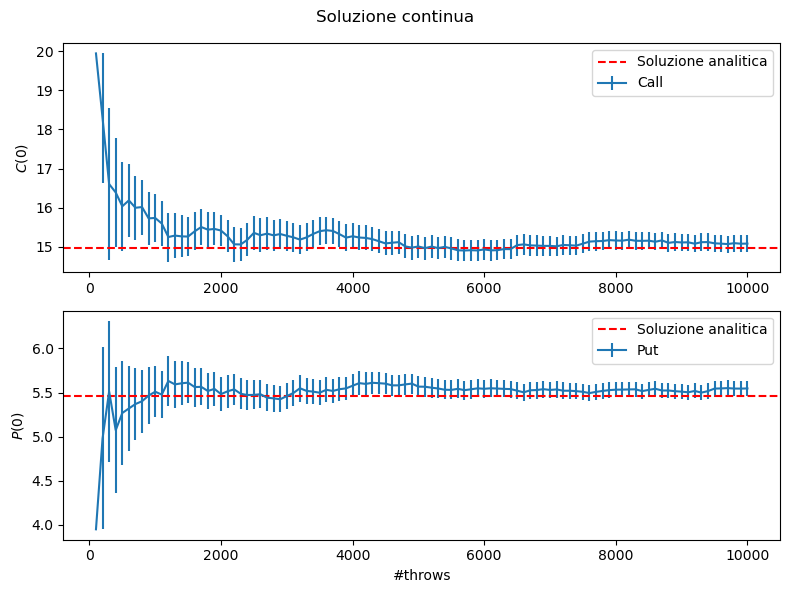

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Funzione di Black-Scholes
def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * np.sqrt(T)) * (np.log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * np.sqrt(T)
    C = S0 * N(d1) - K * np.exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * np.exp(-r * T) * (N(d2)-1.)
    return C, P

# Funzione N(x) (funzione cumulativa della distribuzione normale standard)
def N(x):
    return 0.5 * (1. + erf(x / np.sqrt(2.)))

# Dati per il modello Black-Scholes
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25

# Calcolo di call e put con il modello Black-Scholes
call, put = black_scholes(S0, K, T, r, sigma)

# Dati dei risultati dal metodo Pull Direct per call e put
A = np.loadtxt("call_direct.data")
B = np.loadtxt("put_direct.data")

# Creazione dei plot
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Plot per Call Direct
axs[0].errorbar(A[:, 0], A[:, 1], yerr=A[:, 2], label='Call')
axs[0].axhline(call, color='red', linestyle='--',label="Soluzione analitica")
axs[0].set_ylabel(r'$C(0)$')
axs[0].legend()

# Plot per Put Direct
axs[1].errorbar(B[:, 0], B[:, 1], yerr=B[:, 2], label='Put')
axs[1].axhline(put, color='red', linestyle='--', label="Soluzione analitica")
axs[1].set_xlabel('#throws')
axs[1].set_ylabel(r'$P(0)$')
axs[1].legend()

# Titolo generale
plt.suptitle('Soluzione continua')

plt.tight_layout()
plt.show()


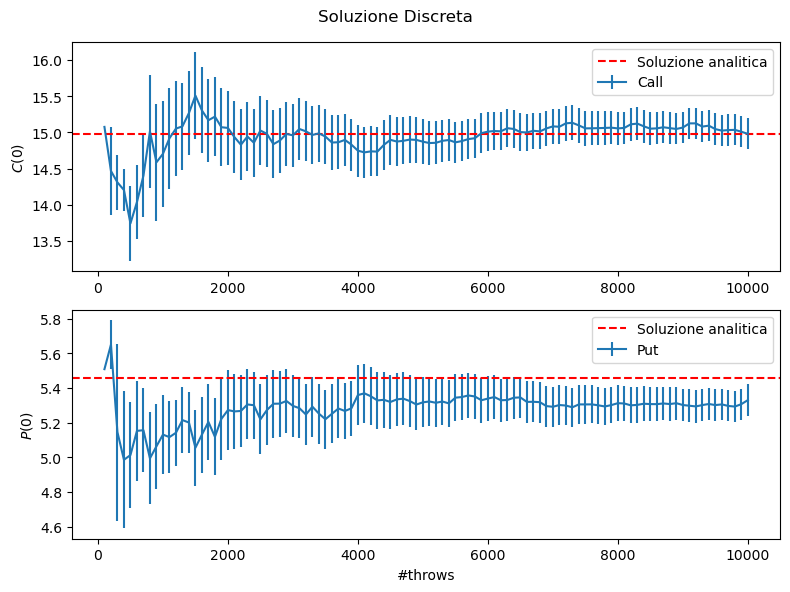

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Funzione di Black-Scholes
def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * np.sqrt(T)) * (np.log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * np.sqrt(T)
    C = S0 * N(d1) - K * np.exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * np.exp(-r * T) * (N(d2)-1.)
    return C, P

# Funzione N(x) (funzione cumulativa della distribuzione normale standard)
def N(x):
    return 0.5 * (1. + erf(x / np.sqrt(2.)))

# Dati per il modello Black-Scholes
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25

# Calcolo di call e put con il modello Black-Scholes
call, put = black_scholes(S0, K, T, r, sigma)

# Dati dei risultati dal metodo Pull Direct per call e put
A = np.loadtxt("call_discretized.data")
B = np.loadtxt("put_discretized.data")

# Creazione dei plot
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Plot per Call Direct
axs[0].errorbar(A[:, 0], A[:, 1], yerr=A[:, 2], label='Call')
axs[0].axhline(call, color='red', linestyle='--',label="Soluzione analitica")
axs[0].set_ylabel(r'$C(0)$')
axs[0].legend()

# Plot per Put Direct
axs[1].errorbar(B[:, 0], B[:, 1], yerr=B[:, 2], label='Put')
axs[1].axhline(put, color='red', linestyle='--', label="Soluzione analitica")
axs[1].set_xlabel('#throws')
axs[1].set_ylabel(r'$P(0)$')
axs[1].legend()

# Titolo generale
plt.suptitle('Soluzione Discreta')

plt.tight_layout()
plt.show()
